# Application of LLE

On the Klein Bottle surface, generate random sets of data points, using LLE method find appropriate 2-D coordinate reduction.

Explain your choice of k.

# Klein Bottle section bottle shape

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.utils import check_random_state
from matplotlib.ticker import NullFormatter

# question 1 a

In [3]:
#write down the equation
def surf(u,v):
    x = -2/15 * np.cos(u) * (3 * np.cos(v) - 30 * np.sin(u) + 90 * np.cos(u)**4 * np.sin(u) 
                         -60 * np.cos(u)**6 * np.sin(u) + 5 * np.cos(u) * np.cos(v) * np.sin(u))
    y = -1/15 * np.sin(u) * (3 * np.cos(v) - 3 * np.sin(u)**2 * np.cos(v) - 48 * np.cos(u)**4 \
                         * np.cos(v)+48 * np.cos(u)**6 * np.cos(v) - 60 * np.sin(u) + 5 * np.cos(u) \
                         * np.cos(v) * np.sin(u) - 5 * np.cos(u)**3 * np.cos(v) * np.sin(u) \
                         -80 * np.cos(u)**5 * np.cos(v) * np.sin(u) \
                         + 80 * np.cos(u)**7 * np.cos(v) * np.sin(u))
    z = 2/15 * (3 + 5 * np.cos(u) * np.sin(u)) * np.sin(v)
    return x, y, z

In [4]:
#set the number of sample
n_samples = 5000

In [5]:
#generate the dataset
random_state = check_random_state(0)
v = random_state.rand(n_samples) * (2 * np.pi )
u = random_state.rand(n_samples) * np.pi

ux, vx =  np.meshgrid(u,v)
x, y, z = surf(u, v)

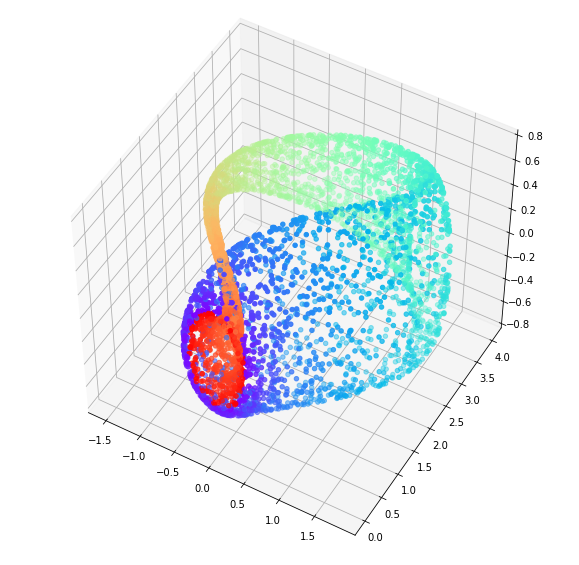

In [6]:
#draw the pic
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=u, cmap=plt.cm.rainbow)
ax.view_init(50, -60)
plt.show()

In [19]:
#def a function to output plots with a series of k
def nplot(data, neighbors):
    from sklearn.manifold import LocallyLinearEmbedding
    fig = plt.figure(figsize=(16, 8))

    for i in range(len(n_neighbors)):
        trans_data = LocallyLinearEmbedding(n_neighbors[i], 2,
                                method='standard').fit_transform(data).T
        

        ax = fig.add_subplot(251 + i)
        plt.scatter(trans_data[0], trans_data[1], c=u, cmap=plt.cm.rainbow)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.title('n_neighbors: %.2g' % (n_neighbors[i]) )
        plt.axis('tight')

    plt.show

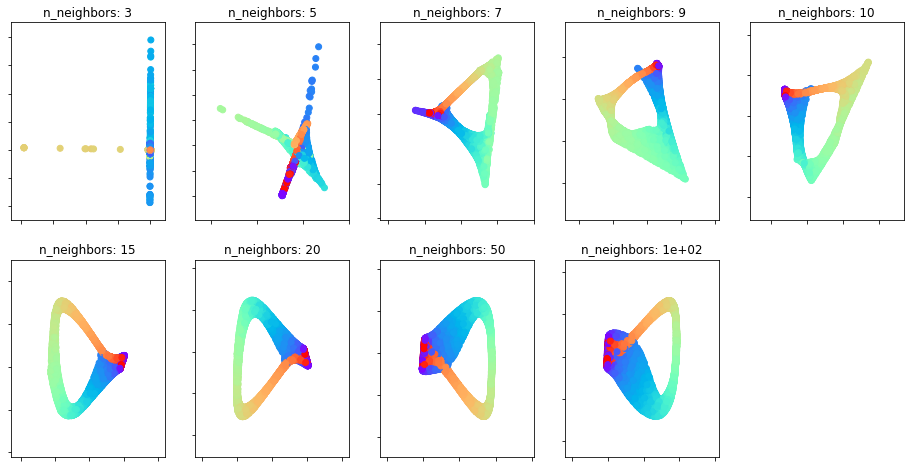

In [13]:
#use 5000 data
sphere_data_1 = np.array([x, y, z]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]

nplot(sphere_data_1, n_neighbors)

<function matplotlib.pyplot.show>

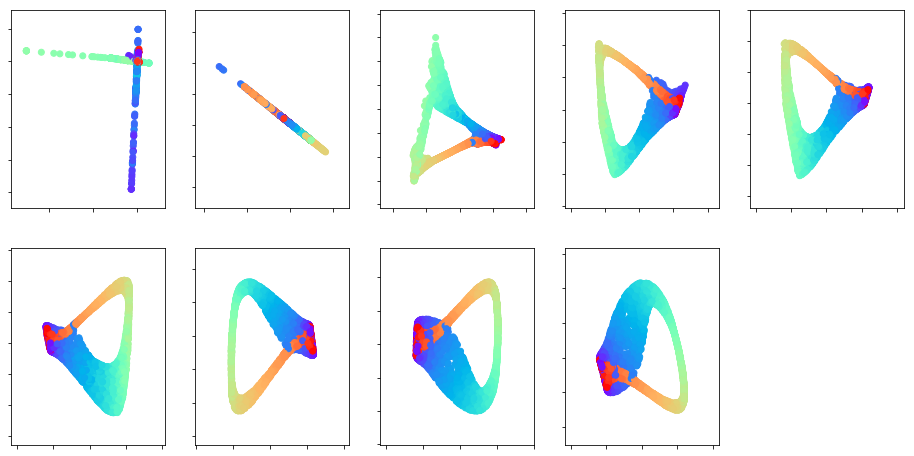

In [205]:
#use first 2500 data
sphere_data_2 = np.array([x[range(2500)], y[range(2500)], z[range(2500)]]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]

nplot(sphere_data_2, n_neighbors)

<function matplotlib.pyplot.show>

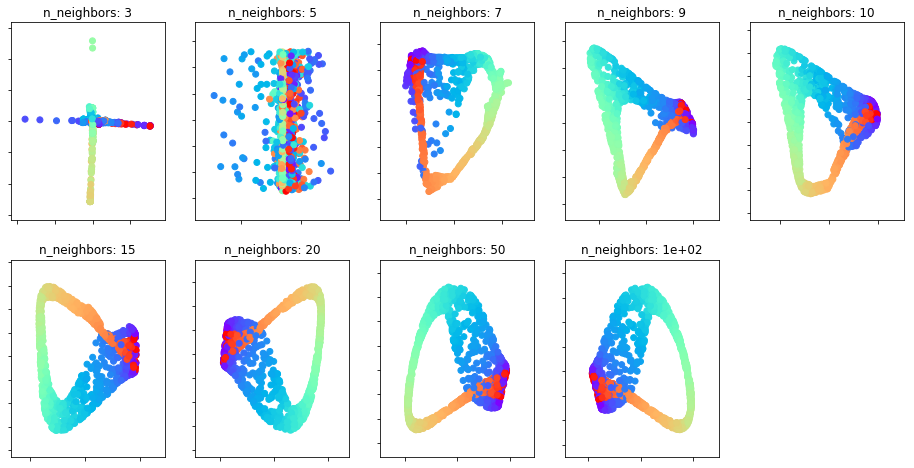

In [212]:
#use first 1000 data
sphere_data_3 = np.array([x[range(1000)], y[range(1000)], z[range(1000)]]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]

nplot(sphere_data_3, n_neighbors)

<function matplotlib.pyplot.show>

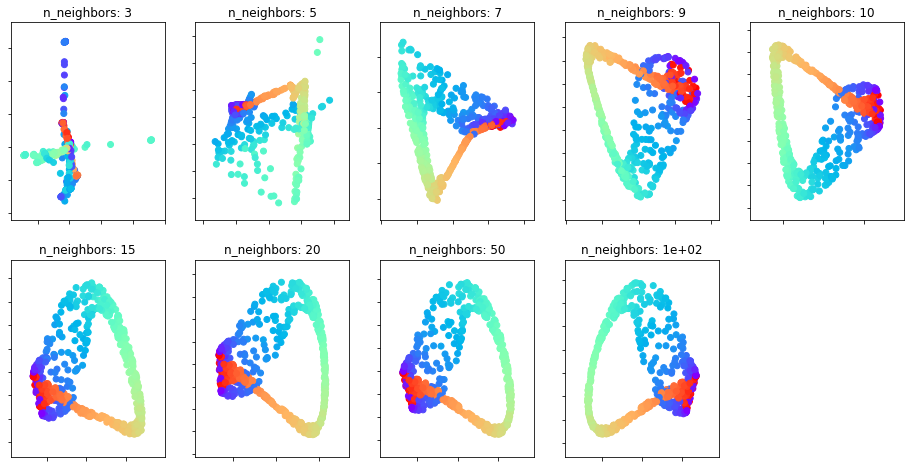

In [213]:
#use first 500 data
sphere_data_4 = np.array([x[range(500)], y[range(500)], z[range(500)]]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]

nplot(sphere_data_4, n_neighbors)

My choice of k is 9. Generally speaking, the higher the k is, the more accurate LLE can save the info, but after k is big enough, the plot doesn't change too much any more, it just swith different angles. However, the cost of time could increase with k increase. 

According to those result, i don't think there's a obvious relationship between k i choose and the number of data, when data is big enough to show the basic structure.

# For fun 

In [28]:
sample_number = 2500
r = 1
c = 0.5
a = 0
b = 8
u = np.random.uniform(0, r, size = sample_number)
v = np.random.uniform(a/c,b/c,size = sample_number) 

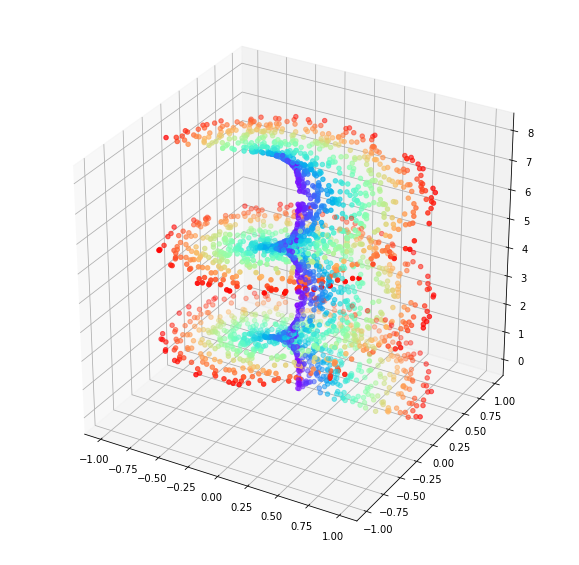

In [29]:
x = u*np.cos(v)
y = u*np.sin(v)
z = c*v

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=u, cmap=plt.cm.rainbow)
plt.show()

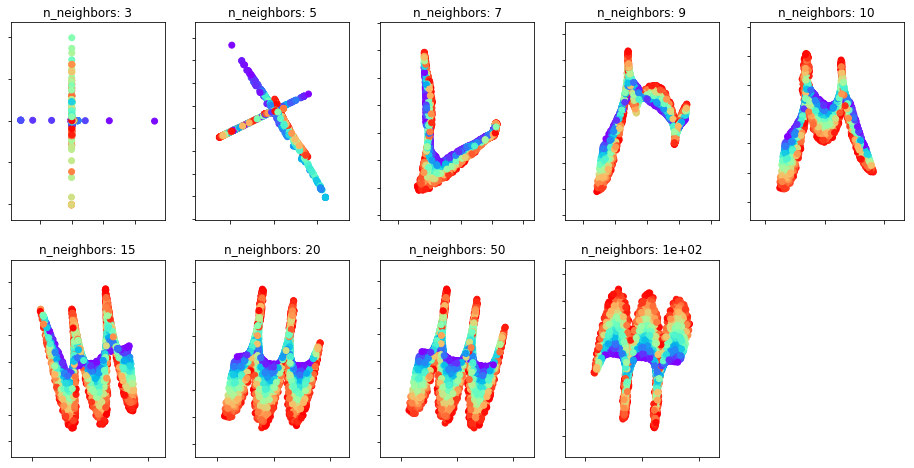

In [30]:
sphere_data_1 = np.array([x, y, z]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]
nplot(sphere_data_1, n_neighbors)

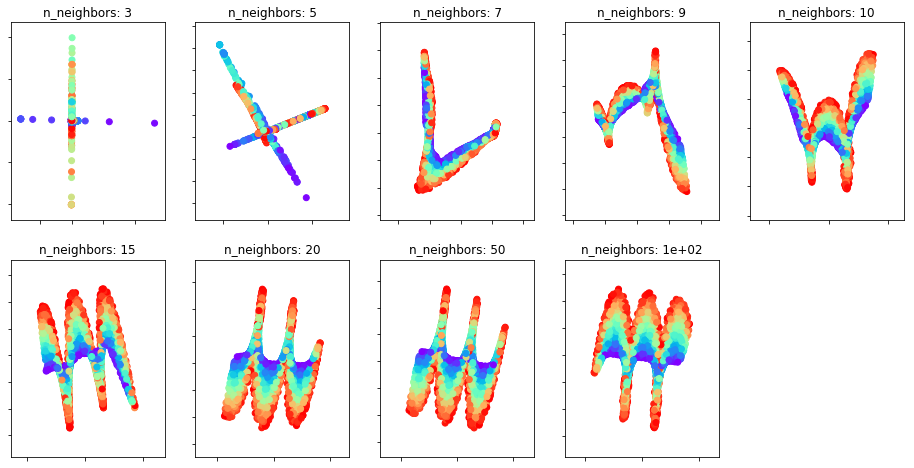

In [31]:
sphere_data_2 = np.array([x[range(1000)], y[range(1000)], z[range(1000)]]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]
nplot(sphere_data_1, n_neighbors)

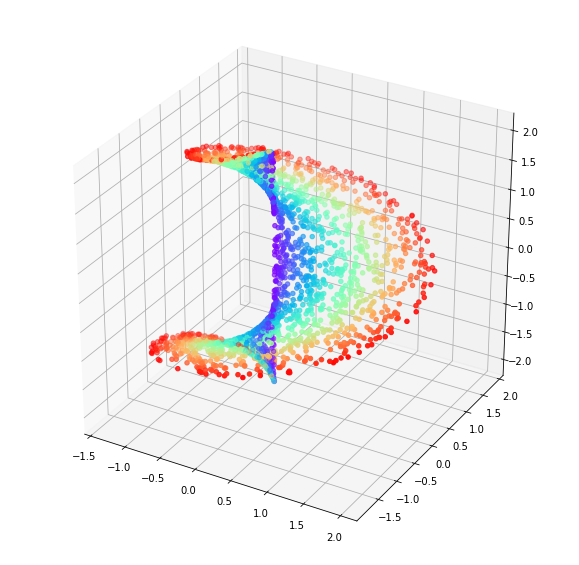

In [39]:
r=2
u = np.random.uniform(0, 1, size = sample_number)
v = np.random.uniform(-r,r,size = sample_number) 

x = u* (r**2 - v**2)**.5 * np.cos(v/.5)
y = u* (r**2 - v**2)**.5 * np.sin(v/.5)
z = v

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=u, cmap=plt.cm.rainbow)
plt.show()

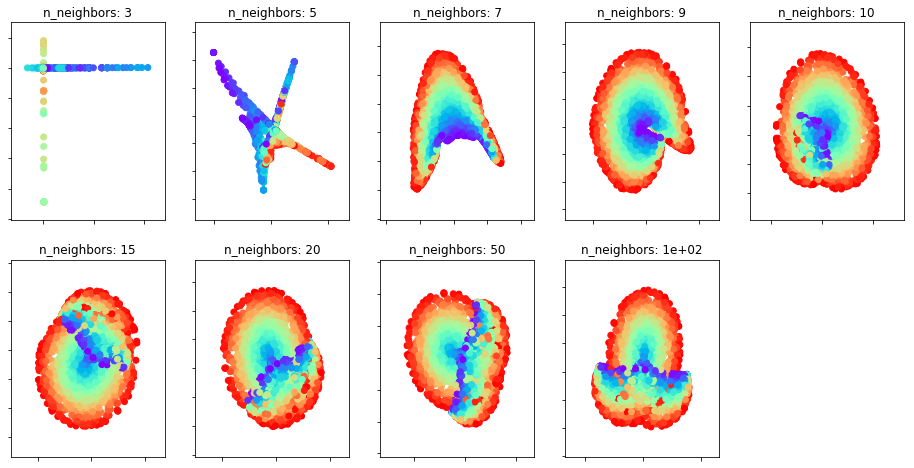

In [40]:
sphere_data_1 = np.array([x, y, z]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]
nplot(sphere_data_1, n_neighbors)

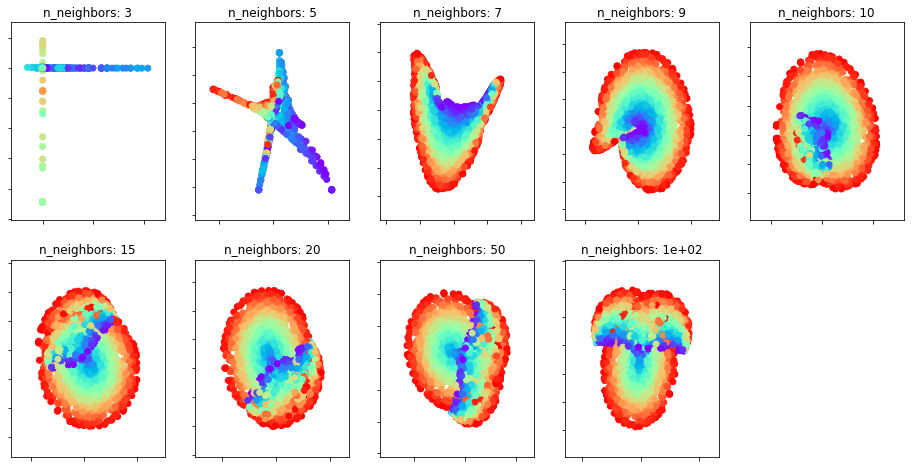

In [42]:
sphere_data_2 = np.array([x[range(500)], y[range(500)], z[range(500)]]).T
n_neighbors = [3, 5, 7, 9, 10, 15, 20, 50, 100]
nplot(sphere_data_1, n_neighbors)